# Practical Machine Learning for Physicists
## Week 6 Exercise 
## Deadline Monday 30th November at 12pm (Noon)

In this notebook you will be trying to predict a system using incomplete information. We will set up the equations of motions for a simple double pendulum (or should that be a double simple pendulum. Then we will see if a machine learning technique can predict the future position of the lower mass, using only the lower mass positions.

### Kinematics of the double pendulum
Let's specify our problem in terms of the following, with the origin at the pivot point of the top pendulum. This is just background for the machine learning tasks at the bottom of the notebook.

#### Positions
$$x_1 = L_1 \sin \theta_1$$
$$y_1 = -L_1 \cos \theta_1$$
$$x_2 = x_1 + L_2 \sin \theta_2$$
$$y_2 = y_1 - L_2 \cos \theta_2$$

#### Velocities
$$\dot{x}_1 = \dot{\theta_1} L_1 \cos \theta_1$$
$$\dot{y_1} =  \dot{\theta_1} L_1 \sin \theta_1$$
$$\dot{x_2} = \dot{x_1} + \dot{\theta_2} L_2 \cos \theta_2$$
$$\dot{y_2} = \dot{y_1} + \dot{\theta_2} L_2 \sin \theta_2$$


#### Accelerations

$$\ddot{x}_1 = -\dot{\theta_1}^2 L_1 \sin \theta_1 + \ddot{\theta_1} L_1 \cos \theta_1$$
$$\ddot{y_1} =  \dot{\theta_1}^2 L_1 \cos \theta_1 + \ddot{\theta_1} L_1 \sin \theta_1$$
$$\ddot{x_2} = \ddot{x_1} - \dot{\theta_2}^2 L_2 \sin \theta_2 + \ddot{\theta_2} L_2 \cos \theta_2$$
$$\ddot{y_2} = \ddot{y_1} + \dot{\theta_2}^2 L_2 \cos \theta_2 + \ddot{\theta_2} L_2 \sin \theta_2$$

#### Energies
Let $v_1^2 = \dot{x_1}^2 +\dot{y_1}^2$ and $v_2^2 = \dot{x_2}^2 +\dot{y_2}^2$ then the kinetic energies $T_1$ and $T_2$ are
$$ T_1 = \frac{1}{2}m_1 v_1^2 = \frac{1}{2}m_1 L_1^2 \dot{\theta_1}^2 $$
$$ T_2 = \frac{1}{2}m_2 v_2^2 = \frac{1}{2}m_2 \left( L_1^2 \dot{\theta_1}^2 + L_2^2 \dot{\theta_2}^2 + 2L_1 L_2 \cos(\theta_1-\theta_2) \dot{\theta_1} \dot{\theta_2} \right) $$

The potential enrgies are
$$V_1 = m_1 g y_1 = - m_1 g L_1 \cos \theta_1$$
$$V_2 = m_2 g y_2 = -m_2 g ( L_1 \cos \theta_1 + L_2 \cos \theta_2)$$

#### Langrangian
Now we form the Lagrangian $L=T-V=T_1+T_2 -V_1 -V_2$ and use the Euler-Lagrange equations:
$$\frac{\partial L}{\partial \theta_1} = \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_1}}$$
$$\frac{\partial L}{\partial \theta_2} = \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_2}}$$

Applying these gives
$$-(m_1+m_2) g L_1 \sin \theta_1 = (m_1+m_2) L_1^2 \ddot{\theta_1} + m_2 L_1 L_2 \sin(\theta_1-\theta_2) \dot{\theta_2}^2 +  m_2 L_1 L_2 \cos(\theta_1-\theta_2) \ddot{\theta_2} $$
and
$$ -m_2 g L_2 \sin \theta_2 = m_2 L_2 \ddot{\theta_2} + m_2 L_1 L_2 \cos(\theta_1-\theta_2) \ddot{\theta_1} + m_2 L_1 L_2 \sin(\theta_1-\theta_2) \dot{\theta_1}^2 $$ 


#### Equations of motions
$$ \omega_1 = \dot{\theta_1}$$  

$$ \omega_2 = \dot{\theta_2}$$ 
$$ \ddot\theta_1 = \frac{1}{L_1\xi}\left[L_1m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\omega_1^2 + L_2m_2\sin(\theta_1-\theta_2)\omega_2^2 - m_2g\cos(\theta_1-\theta_2)\sin(\theta_2) + (m_1+m_2)g\sin(\theta_1) \right] $$
$$ \ddot\theta_2 = \frac{1}{L_2\xi}\left[L_2m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\omega_2^2 + L_1(m_1+m_2)\sin(\theta_1-\theta_2)\omega_1^2+(m_1+m_2)g\sin(\theta_1)\cos(\theta_1-\theta_2) - (m_1+m_2)g\sin(\theta_2) \right] $$
where 
$$\xi \equiv \cos^2(\theta_1-\theta_2)m_2-m_1-m_2$$


# Exercises: Predicting Chaos
1. Design and train a recurrent neural network (of your choice) to predict the future positions, where future is defined as $t=t_0 + 20 \delta t$, of the masses $m_1$ and $m_2$ using their cartesian coordinates and the initial conditions  $z_0=[\pi/4,0,\pi/4,0]$. 
2. How stable is your network to variations in initial conditions? Make a plot of $x$ and $y$ vs time to show the network prediction in comparison to the solution from solve_ivp
3. How far into the future can a network predict? Make a plot showing how the deviation between predicted position and actual position (from solve_ivp above) vary as a function of extrapolation time from $t=t_0 + 20 \delta t$ to $t=t_0 + 100 \delta t$  (e.g. for each extrapolation time, train a new version of the network and then plot the performance)
4. Repeat steps 1-3 for the initial conditions $z_0=[\pi/2,0,\pi/2,0]$ which give a much more complex path.
5. Repeat steps 1-4 but only train your neural network on the cartesian coordinates of the mass $m_2$ (i.e without showing your neural network the positions of the mass $m_1$)



In [ ]:
import numpy as np
from numpy import concatenate
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

import matplotlib.style
import matplotlib as mpl

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

import tensorflow as tf
import keras
import keras.layers as layers

from tqdm import tqdm



In [ ]:
def rhs(t, z, L1, L2, m1, m2, g):
    """
    Returns the right-hand side of the ordinary differential equation describing the double pendulem
    """
    theta1, w1, theta2, w2 = z    #The four components
    cos12 = np.cos(theta1 - theta2)
    sin12 = np.sin(theta1 - theta2)
    sin1 = np.sin(theta1)
    sin2 = np.sin(theta2)
    xi = cos12**2*m2 - m1 - m2
    w1dot = ( L1*m2*cos12*sin12*w1**2 + L2*m2*sin12*w2**2
            - m2*g*cos12*sin2      + (m1 + m2)*g*sin1)/(L1*xi)
    w2dot = -( L2*m2*cos12*sin12*w2**2 + L1*(m1 + m2)*sin12*w1**2
            + (m1 + m2)*g*sin1*cos12  - (m1 + m2)*g*sin2 )/(L2*xi)
    return w1, w1dot, w2, w2dot   #Return the w's and the wdot's


def to_cartesian(theta1, w1, theta2, w2, L1, L2):
    """ 
    Transforms theta and omega to cartesian coordinates and velocities x1, y1, x2, y2, vx1, vy1, vx2, vy2
    """
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    vx1 = L1*np.cos(theta1)*w1
    vy1 = L1*np.sin(theta1)*w1
    vx2 = vx1 + L2*np.cos(theta2)*w2
    vy2 = vy1 + L2*np.sin(theta2)*w2
    return x1, y1, x2, y2, vx1, vy1, vx2, vy2


def solve_pendulum(L1, L2, m1, m2, g, z0, t):
    #Time ranges
    tmax, dt = 50, 0.1
    t = np.arange(0, tmax+dt, dt)

    # Solve initial value problem
    ret = solve_ivp(rhs, (0,tmax), z0, t_eval=t, args=(L1, L2, m1, m2, g))
    z = ret.y

    # Extract result
    theta1, w1, theta2, w2 = z[0], z[1], z[2], z[3]
    return to_cartesian(theta1, w1, theta2, w2, L1, L2)

    

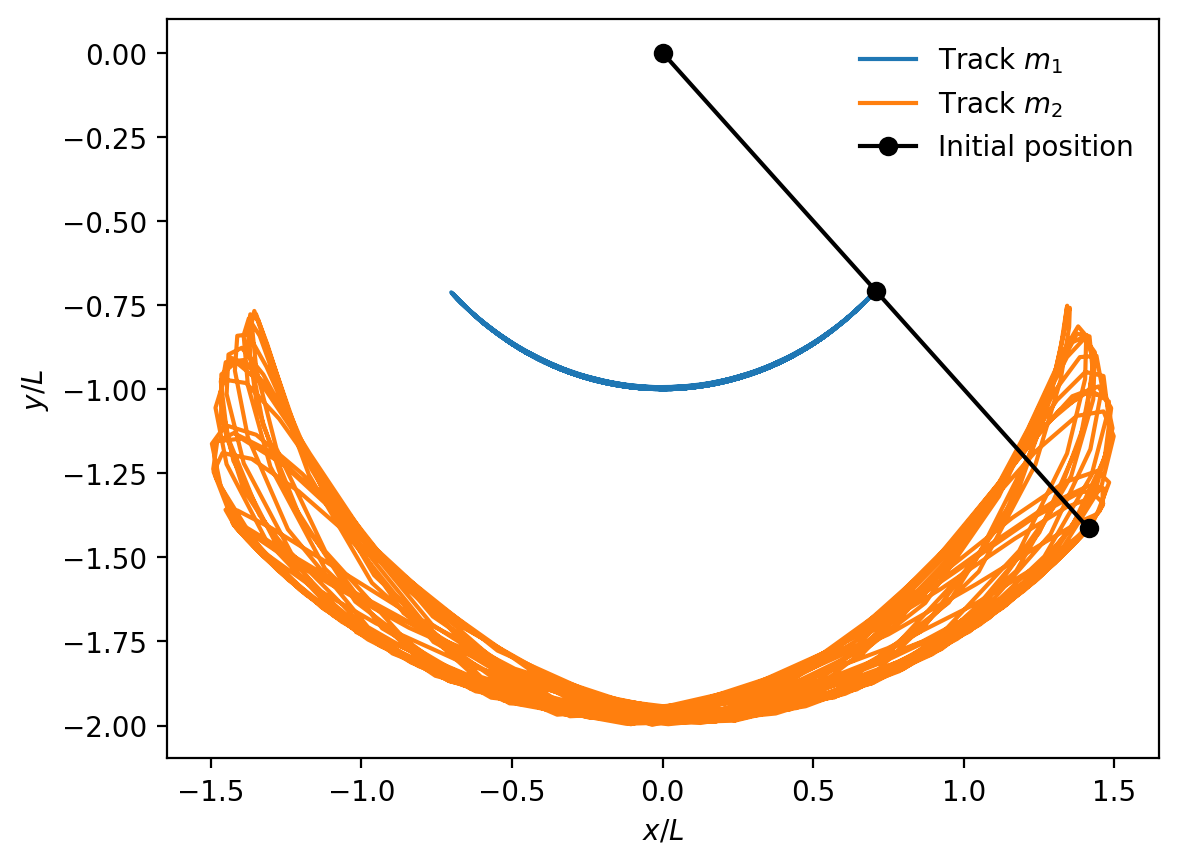

In [93]:
# set initial conditions
L1, L2 = 1., 1.                 # lengths, m
m1, m2 = 3., 1.                 # masses, kg
g = 9.81                        # gravitational acceleration, m/s^2 
z0 = [np.pi/4, 0, np.pi/4, 0]   # starting angles

# define time range
tmax, dt = 50, 0.1
t = np.arange(0, tmax+dt, dt)

x1, y1, x2, y2, vx1, vy1, vx2, vy2 = solve_pendulum(L1, L2, m1, m2, g, z0, t)

fig, ax = plt.subplots()
ax.plot(x1, y1, label=r"Track $m_1$")
ax.plot(x2, y2, label=r"Track $m_2$")
ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], "-o", label="Initial position", c='k')
plt.ylabel(r"$y/L$")
plt.xlabel(r"$x/L$")
ax.legend()

In [98]:

def shapeArray(x, windowSize, offset):
    """
    Splits up a 1-d array x into a series of overlapping windows.
    
    Params:
        x: the 1-d array to split
        windowSize: the number of samples used to train the network
        offset: the number of samples into the future to predict
        
    Returns:
        input, label: a tuple of the array of input windows and target (label) windows,
                each with dimensions (numberOfWindows, windowSize)
    """
    input = np.array([x[i : i + windowSize] for i in range(len(x) - (windowSize + offset) + 1)])
    label = np.array([x[i + windowSize : i + windowSize + offset] for i in range(len(x) - (windowSize + offset) + 1)])
    return (input, label[:,-1])




def train_model(windowSize, offset):

    #Get our xInput and xLabel arrays    
    x1Input, x1Label = shapeArray(x1, windowSize, offset)
    x2Input, x2Label = shapeArray(x2, windowSize, offset)
    y1Input, y1Label = shapeArray(y1, windowSize, offset)
    y2Input, y2Label = shapeArray(y2, windowSize, offset)

    # reshape input and target arrays and divide into training and testing data
    input = np.concatenate( (x1Input, x2Input, y1Input, y2Input), axis = 1).reshape(*np.array(x1Input).shape, 4)
    input_train = input[0:345,:,:]
    input_test = input[346:-1,:,:]
    target = np.concatenate( (x1Label, x2Label, y1Label, y2Label)).reshape(len(x1Label), 4)
    target_train = target[0:345,:]
    target_test = target[346:-1,:]

    print(np.shape(input_train), np.shape(target_train))

    model = keras.models.Sequential()
    model.add(layers.LSTM(200, input_shape = (None, 4), return_sequences = True)) # LSTM layer with 50 neurons
    model.add(layers.LSTM(100, return_sequences = False))
    model.add(layers.Dense(128, activation = 'linear'))
    model.add(layers.Dense(4, activation = "linear"))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')

    model.summary()

    history = model.fit(input_train, target_train, epochs = 30)
    cost = history.history['loss'][-1]

    return model, x1Input, x2Input, y1Input, y2Input, input_test, target_test, cost




## Training the network

(345, 50, 4) (345, 4)
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_96 (LSTM)              (None, None, 200)         164000    
                                                                 
 lstm_97 (LSTM)              (None, 100)               120400    
                                                                 
 dense_84 (Dense)            (None, 128)               12928     
                                                                 
 dense_85 (Dense)            (None, 4)                 516       
                                                                 
Total params: 297,844
Trainable params: 297,844
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 4s 54ms/step - loss: 0.7494
Epoch 2/30
11/11 [==============================] - 1s 56ms/step - loss: 0.69

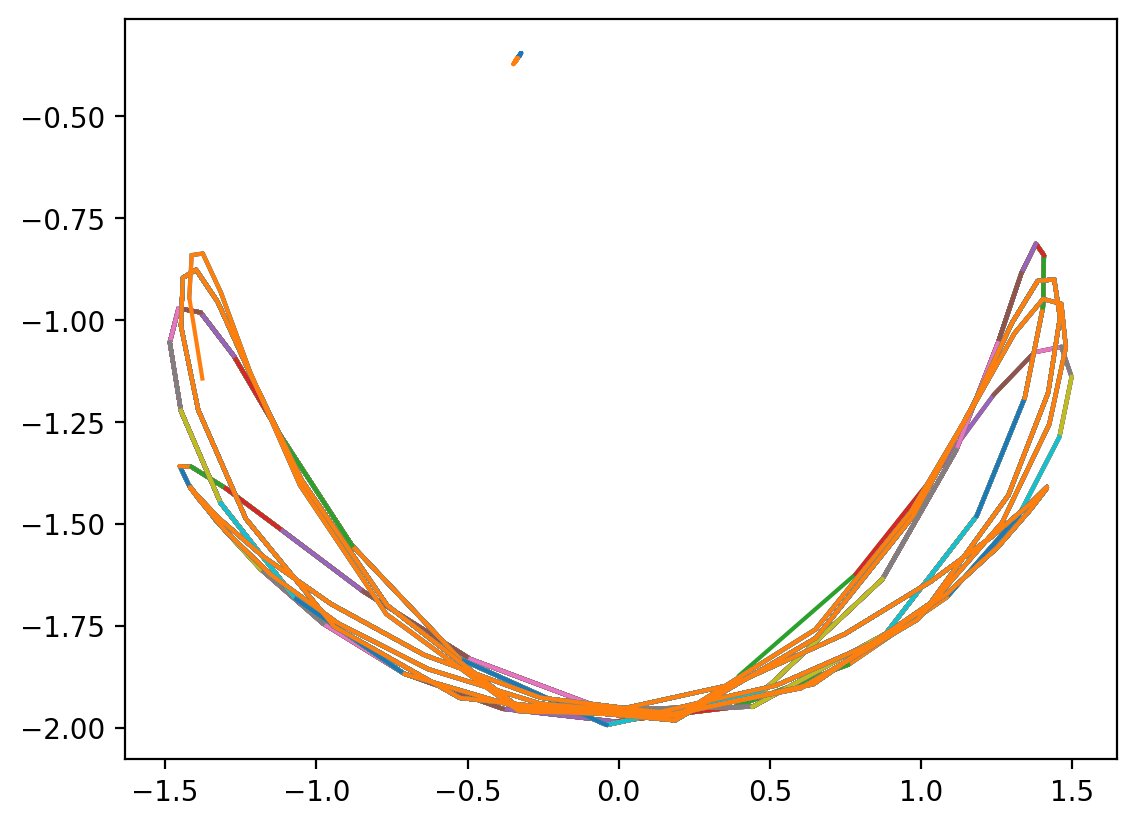

In [99]:
windowSize = 50 # number of samples we will use to train our network
offset = 20 # how many samples into the future to predict

model, x1Input, x2Input, y1Input, y2Input, input_test, target_test, cost = train_model(windowSize, offset)
test_predict = model.predict(input_test)
predicted_x1 = test_predict[:,0]
predicted_x2 = test_predict[:,1]
predicted_y1 = test_predict[:,2]
predicted_y2 = test_predict[:,3]

fig, ax = plt.subplots()
ax.plot(predicted_x1, predicted_y1)
ax.plot(predicted_x2, predicted_y2)
ax.plot(x2Input[356:], y2Input[356:])


In [ ]:
offsets = np.linspace(20,100,11)
windowSize = 50
costs = np.zeros(len(offsets))

for i in tqdm(range(len(offsets))):
    model, x1Input, x2Input, y1Input, y2Input, input_test, target_test, cost = train_model(windowSize, offsets[i].astype(int))
    test_predict = model.predict(input_test)
    predicted_x1 = test_predict[:,0]
    predicted_x2 = test_predict[:,1]
    predicted_y1 = test_predict[:,2]
    predicted_y2 = test_predict[:,3]
    costs[i] = cost

fig, ax = plt.subplots()
ax.plot(offsets, costs)
ax.set_xlabel("Offset")
ax.set_ylabel("Loss")

Increasing the offset, i.e. increasing the distance into the future that the model predicts, increases the loss. The model is less accurate when it tries to predict further into the future.

Pendulum with starting positions $z_0=[\pi/2,0,\pi/2,0]$:

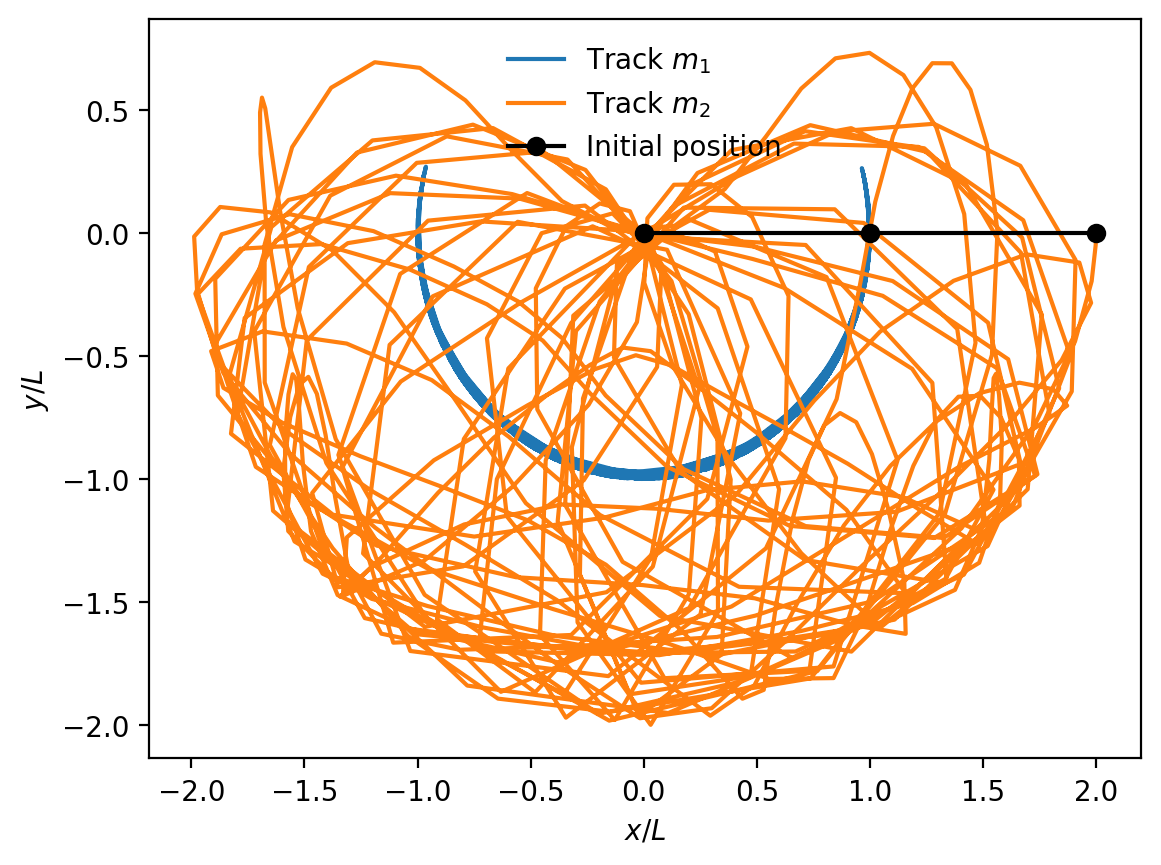

In [90]:
# set initial conditions
L1, L2 = 1., 1.                 # lengths, m
m1, m2 = 3., 1.                 # masses, kg
g = 9.81                        # gravitational acceleration, m/s^2 
z0 = [np.pi/2, 0, np.pi/2, 0]   # starting angles

# define time range
tmax, dt = 50, 0.1
t = np.arange(0, tmax+dt, dt)

x1, y1, x2, y2, vx1, vy1, vx2, vy2 = solve_pendulum(L1, L2, m1, m2, g, z0, t)

fig, ax = plt.subplots()
ax.plot(x1, y1, label=r"Track $m_1$")
ax.plot(x2, y2, label=r"Track $m_2$")
ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], "-o", label="Initial position", c='k')
plt.ylabel(r"$y/L$")
plt.xlabel(r"$x/L$")
ax.legend()

  0%|          | 0/11 [00:00<?, ?it/s]

(345, 50, 4) (345, 4)
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_71 (LSTM)              (None, 32)                12416     
                                                                 
 dense_58 (Dense)            (None, 128)               4224      
                                                                 
 dense_59 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 31ms/step - loss: 0.6837
Epoch 2/30
11/11 [==============================] - 0s 27ms/step - loss: 0.6689

  9%|▉         | 1/11 [00:13<02:19, 13.94s/it]

(345, 50, 4) (345, 4)
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_73 (LSTM)              (None, 32)                12416     
                                                                 
 dense_60 (Dense)            (None, 128)               4224      
                                                                 
 dense_61 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 31ms/step - loss: 0.6839
Epoch 2/30
11/11 [==============================] - 0s 30ms/step - loss: 0.6757

 18%|█▊        | 2/11 [00:28<02:09, 14.36s/it]

(345, 50, 4) (345, 4)
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_75 (LSTM)              (None, 32)                12416     
                                                                 
 dense_62 (Dense)            (None, 128)               4224      
                                                                 
 dense_63 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 32ms/step - loss: 0.6986
Epoch 2/30
11/11 [==============================] - 0s 32ms/step - loss: 0.6832

 27%|██▋       | 3/11 [00:46<02:07, 15.90s/it]

(345, 50, 4) (345, 4)
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_76 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_77 (LSTM)              (None, 32)                12416     
                                                                 
 dense_64 (Dense)            (None, 128)               4224      
                                                                 
 dense_65 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 33ms/step - loss: 0.6949
Epoch 2/30
11/11 [==============================] - 0s 34ms/step - loss: 0.6738

 36%|███▋      | 4/11 [01:03<01:55, 16.51s/it]

(345, 50, 4) (345, 4)
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_78 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_79 (LSTM)              (None, 32)                12416     
                                                                 
 dense_66 (Dense)            (None, 128)               4224      
                                                                 
 dense_67 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 34ms/step - loss: 0.7036
Epoch 2/30
11/11 [==============================] - 0s 35ms/step - loss: 0.6748

 45%|████▌     | 5/11 [01:20<01:40, 16.75s/it]

(345, 50, 4) (345, 4)
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_81 (LSTM)              (None, 32)                12416     
                                                                 
 dense_68 (Dense)            (None, 128)               4224      
                                                                 
 dense_69 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 33ms/step - loss: 0.6905
Epoch 2/30
11/11 [==============================] - 0s 33ms/step - loss: 0.6899

 55%|█████▍    | 6/11 [01:38<01:25, 17.14s/it]

(345, 50, 4) (345, 4)
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_82 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_83 (LSTM)              (None, 32)                12416     
                                                                 
 dense_70 (Dense)            (None, 128)               4224      
                                                                 
 dense_71 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 4s 36ms/step - loss: 0.7202
Epoch 2/30
11/11 [==============================] - 0s 38ms/step - loss: 0.6855

 64%|██████▎   | 7/11 [01:57<01:10, 17.70s/it]

(345, 50, 4) (345, 4)
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_85 (LSTM)              (None, 32)                12416     
                                                                 
 dense_72 (Dense)            (None, 128)               4224      
                                                                 
 dense_73 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 35ms/step - loss: 0.7020
Epoch 2/30
11/11 [==============================] - 0s 37ms/step - loss: 0.6891

 73%|███████▎  | 8/11 [02:14<00:52, 17.55s/it]

(345, 50, 4) (345, 4)
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_86 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_87 (LSTM)              (None, 32)                12416     
                                                                 
 dense_74 (Dense)            (None, 128)               4224      
                                                                 
 dense_75 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 34ms/step - loss: 0.7383
Epoch 2/30
11/11 [==============================] - 0s 35ms/step - loss: 0.6957

 82%|████████▏ | 9/11 [02:32<00:34, 17.50s/it]

(345, 50, 4) (345, 4)
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_88 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_89 (LSTM)              (None, 32)                12416     
                                                                 
 dense_76 (Dense)            (None, 128)               4224      
                                                                 
 dense_77 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 4s 33ms/step - loss: 0.7146
Epoch 2/30
11/11 [==============================] - 0s 35ms/step - loss: 0.6890

 91%|█████████ | 10/11 [02:50<00:17, 17.73s/it]

(345, 50, 4) (345, 4)
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, None, 64)          17664     
                                                                 
 lstm_91 (LSTM)              (None, 32)                12416     
                                                                 
 dense_78 (Dense)            (None, 128)               4224      
                                                                 
 dense_79 (Dense)            (None, 4)                 516       
                                                                 
Total params: 34,820
Trainable params: 34,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 33ms/step - loss: 0.7190
Epoch 2/30
11/11 [==============================] - 0s 34ms/step - loss: 0.6951

100%|██████████| 11/11 [03:08<00:00, 17.13s/it]


Text(0, 0.5, 'Loss')

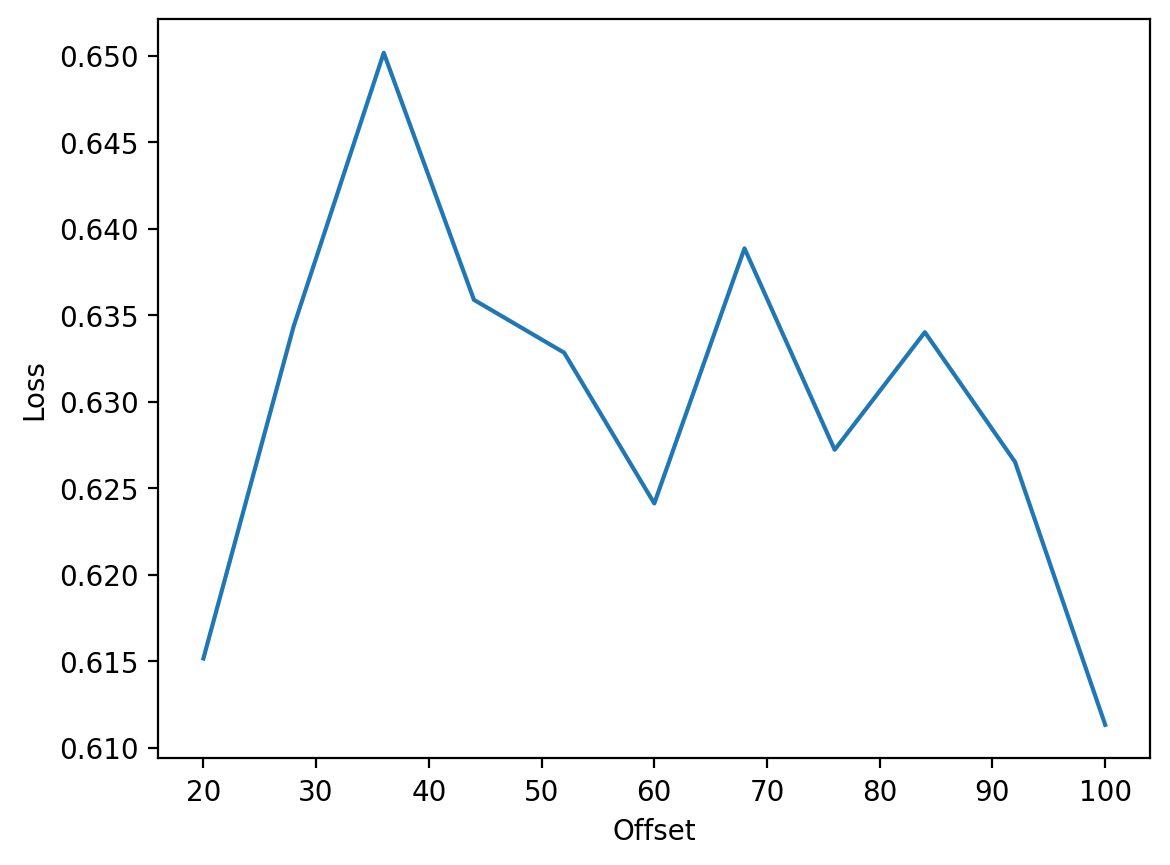

In [91]:
offsets = np.linspace(20,100,11)
windowSize = 50
costs = np.zeros(len(offsets))

for i in tqdm(range(len(offsets))):
    model, x1Input, x2Input, y1Input, y2Input, input_test, target_test, cost = train_model(windowSize, offsets[i].astype(int))
    test_predict = model.predict(input_test)
    predicted_x1 = test_predict[:,0]
    predicted_x2 = test_predict[:,1]
    predicted_y1 = test_predict[:,2]
    predicted_y2 = test_predict[:,3]
    costs[i] = cost

fig, ax = plt.subplots()
ax.plot(offsets, costs)
ax.set_xlabel("Offset")
ax.set_ylabel("Loss")